In [2]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
con = sqlite3.connect('baseline_v3.2_10yrs.db')
df = pd.read_sql('select night, filter from observations;', con)
con.close()

In [9]:
night = df['night'].values
filter = df['filter'].values

In [15]:
changes = []
for un in np.unique(night):
    in_night = np.where(night == un)[0]
    changes.append(np.where(filter[in_night][1:] != filter[in_night][:-1])[0].size)

In [21]:
np.median(changes)

14.0

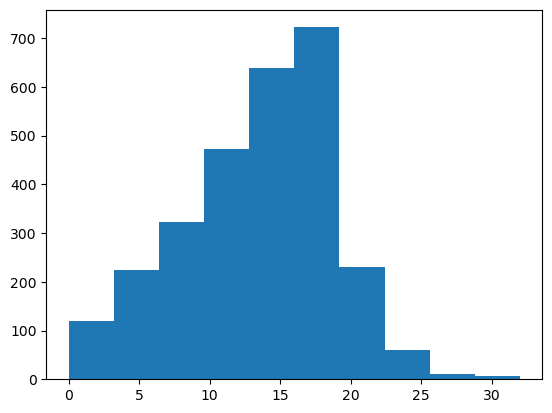

In [19]:
_ack = plt.hist(changes)

In [22]:
38400/2809

13.670345318618725

In [23]:
39564/2809


14.084727661089355

In [30]:
from rubin_sim.maf.batches import filtersPerNight
from rubin_sim import maf

In [28]:
fpn = filtersPerNight()

In [29]:
fpn

{'opsim_Filter_Changes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x28acce450>,
 'opsim_Minimum_time_between_filter_changes_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x28ac99290>,
 'opsim_Number_of_filter_changes_faster_than_lt10_0_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x28c0f7910>,
 'opsim_Number_of_filter_changes_faster_than_lt20_0_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x28c0f7b10>,
 'opsim_Max_number_of_filter_changes_within_10_0_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x28c0f7cd0>,
 'opsim_Max_number_of_filter_changes_within_20_0_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x28c0f7ed0>}

In [ ]:
bg = maf.metricBundles.MetricBundleGroup(fpn, 'baseline_v3.2_10yrs.db', out_dir='temp', results_db=None)
bg.run_all()


> /Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metrics/technical_metrics.py(32)run()
     30         if np.size(np.where(diff == True)[0]) > 20:
     31             import pdb ; pdb.set_trace()
---> 32         return np.size(np.where(diff == True)[0])
     33 
     34 



ipdb>  data_slice


rec.array([(60796.00126323, 0, 'r'), (60796.28758525, 0, 'u'),
           (60796.2880005 , 0, 'u'), ..., (60797.11677091, 1, 'g'),
           (60797.11631827, 1, 'g'), (60797.11812729, 1, 'g')],
          dtype=[('observationStartMJD', '<f8'), ('night', '<i8'), ('filter', 'O')])


ipdb>  data_slice['night']


array([0, 0, 0, ..., 1, 1, 1])
